# Rad sa nebalansiranim skupovima podataka

Za skup podataka kažemo da je `nebalansiran` ukoliko ima značajno više instanci jedne klase u odnosu na drugu klasu (ili klase). Na primer, u skupu svih bankarskih transakcija samo jedan mali procenat transakcija nije regularan i podleže zakonskim procedurama. Slično, među pacijentima jedne bolnice može postoji svega par pacijenata koji boluje od neke retke bolesti. U ovim slučajevima je nebalansiranost podataka prirodna za sam fenomen. Postoje i scenariji u kojima je nebalansiranost podataka posledica lošeg odabira uzorka. Na primer, u anketi je ispitivana većinski mlađa populacijia, a ne opšte mnjenje. 

###  Aktivnosti na skupu podataka 

**Eliminisanje instanci većinske klase (engl. under-sampling)**
Ukoliko je na raspolaganju dovoljan broj instanci manjinske klase, može se izdvojiti isto toliko instanci većinske klase i obučavati model na ovako dobijenom balansiranom skupu. Izbor instanci većinske klase može da bude nasumičan. 

**Generisanje novih instanci (engl. over-sampling)** 
Ukoliko nije na raspolaganju dovoljan broj instanci manjinske klase, može se probati sa generisanjem njenih novih instanci. Na primer, mogu se nasumično ponoviti neke instance, može se iskoristiti tehnika *boosting* kojom se generišu instance iz iste distribucije ili se može iskoristiti *SMOTE* algoritam. Više o ovim pristupima ćemo videti u nastavku.

<img src='assets/under_and_over_sampling.png'>

Oba pomenuta pristupa imaju svoje prednosti i mane. Eliminisanjem instaci može doći do gubitka važnih informacija, dok se generisanjim novih instaci povećava rizik od preprilagođavanja. U oba slučaja nasumičan izbor može biti pristrasan i može uticati na performanse klasifikatora. 

**Ansambli**
U ovom pristupu se teži da se iskoriste svi raspoloživi podaci. Koriste se sve instance manjinske klase i veći broj skupova iste kardinalnosti instanci većinske klase. Na primer, ako imamo 400 instanci manjinske klase i 2000 instanci većinske klase, možemo napraviti 5 skupova podataka sa po 400 instanci manjinske klase i 400 instanci većinske klase. Na svakom od ovih skupova se može naučiti poseban klasifikator, a kao konačna ocena se može uzeti npr. prosek vrednosti. Dalje u praksi se ansambl koristi tako što se pokrenu svi klasifikatori i iskoristiti npr. princip većinskog glasanja za odlučivanje o finalnom obeležju nove instance. 

<img src='assets/resampling_ensamble.png' style='height: 500px;'>
U ovim pristupima se može probati i sa različitim razmerama pozitivne i negativne klase npr. 1:2, 1:3, 2:1 i slično. 

Navodimo još jedan pristup pripreme skupa podataka koji se zasniva na klasterovanju. Većinska klasa se može podeliti u `k` klastera gde `k` predstavlja kardinalnost manjinske klase. Zatim se na osnovu centroida ovako dobijenih klastera može generisati novi skup koji predstavlja većinsku klasu i koji se dalje može koristiti u klasifikaciji. 

### Adaptacija algoritama
Postoji klasa `cost-sensitive` klasifikatora koji su prilagođeni radu sa nebalansiranim podacima tako što kroz specifične funkcije gubitka navodi na poželjno ponašanje klasifikatora. Na primer, mogu se više penalizovati pogrešne klasifikacije instanci manjinskih klasa nego pogrešne klasifikacije instanci većinskih klasa. Jedan takav klasifikator je `XGBoost` i njega ćemo upoznati nešto kasnije na krusu. 

### Evaluacija

Za evaluciju modela koji su trenirani na nebalansiranim skupovima podataka nije poželjno koristiti tačnost. Na primer, ovakvi modeli mogu ostvariti visoku tačnost predviđajući uvek obeležja brojnije klase. Mogu se korisiti preciznost, odziv, F1-mera, ali i AUC mera. 

`ROC (Receiver Operating Characteristic)` jer kriva koja predstavlja vezu između broja lažno pozitivnih (FP) i pravih pozitivnih (TP) instanci za zadati test skup. 

<img src='assets/ROC_curves.png'>

`AUC (Area Under the ROC Curve)` je mera koja predstavlja površinu ispod ROC krive. Interpretiramo je kao količinu  preciznosti koju treba žrtvovati da bi se ostvario visok odziv. U slučaju modela sa slabim performansama, ova vrednost teži broju 0.5 (površina trougla sa sporednom dijagonalom kao hipotenuzom). U slučaju modela sa dobrim performansama, ova vrednost teži broju 1 (površina celog kvadrata).  

<p class='bg-info' style='padding: 20px'>
Python paket <a href='https://github.com/scikit-learn-contrib/imbalanced-learn'> imbalanced-learn </a> nudi mogućnost rada sa svim gore pomenutim tehnikama. Koristićemo ga u daljem radu pa je potrebno instalirati ga komandom <b> conda install -c conda-forge imbalanced-learn</b>. 
<br>
<br> 
Za više informacija pogledati i <a href='https://imbalanced-learn.org/stable/user_guide.html'> zvaničnu dokumentaciju </a> ovog paketa.
</p>

### Zadatak

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [3]:
import imblearn

Potrebno je napraviti klasifikator koji razlikuje regularne i neregularne transakcije. Skup podataka sa kojim cemo raditi je dostupan na [Kaggle platformi](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

In [4]:
data = pd.read_csv('data/creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [6]:
N = data.shape[0]

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Atribut `Time` predstavlja broj sekundi proteklih izmedju tekuće transakcije i prve transakcije u skupu podataka i nećemo ga koristiti u daljem radu. 

In [8]:
data.drop(columns=['Time'], axis=1, inplace=True)

Atributi `V1`, ...., `V28` predstavljaju kolone dobijene redukciom dimenzionalnosti originalnog skupa kako bi se zaštitila privatnost podataka korisnika. 

Atribut `Amount` predstavlja iznos obavljene transakcije.

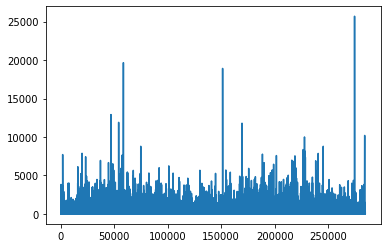

In [9]:
plt.plot(np.arange(0, N), data['Amount'])

Koristićemo log-vrednost ovog atributa kako bi suzili opseg vrednosti. 

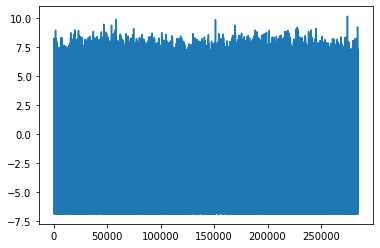

In [10]:
# Da bi se izbegle nula vrednosti dodacemo malu vrdnost iznosima transakcije
eps = 0.001
plt.plot(np.arange(0, N), np.log(data['Amount']+ eps))

In [11]:
data['LogAmount'] = np.log(data['Amount'] + eps)
data.drop(columns=['Amount'], axis=1, inplace=True)

Atribut `Class` predstavlja da li je transakcija regularna (vrednost `0`) ili ne (vrednost `1`).

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Odavde možemo uvideti da je reč o visoko nebalansiranom skupu podataka.

Delimo podatke na skup za treniranje i skup za testiranje. Pritom vodimo računa o stratifikaciji.

In [13]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y)

Standardizujemo podatke. 

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Početni model - logistička regresija

In [16]:
logistic_regression = linear_model.LogisticRegression()

In [17]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluacija početnog modela: 

In [18]:
y_predicted = logistic_regression.predict(X_test)

In [19]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93812,    13],
       [   64,    98]])

In [20]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.88      0.60      0.72       162

    accuracy                           1.00     93987
   macro avg       0.94      0.80      0.86     93987
weighted avg       1.00      1.00      1.00     93987



U slučaju nebalansiranih skupova podataka, tačnost nije relevantna mera. Na primer, u našem slučaju, klasifikator može postići visoku tačnost predviđajući uvek vrednost `0`. Metrike za klasu `0` su dobre, ali za klasu `1` postoji prostor za poboljšanje. Cilj je smanjiti broj lažno negativnih vrednosti jer u ovom slučaju imaju mnogo veći praktični značaj.  

In [21]:
metrics.roc_auc_score(y_test, y_predicted)

0.8023998578914646

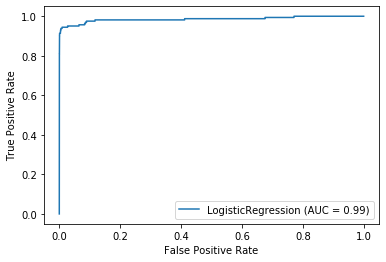

In [22]:
# Napomena: da bi mogla da se koristi funkcija plot_roc_curve, verzija scikit-learn paketa mora da bude 0.22.2
# Zadatak za vezbu: razmislite kako bi ova funkcija mogla da se implementira 
metrics.plot_roc_curve(logistic_regression, X_test, y_test)

### Logistička regresija sa eliminaciom instanci

In [23]:
# polazna brojnost klasa
np.bincount(y_train)

array([190490,    330])

Instance većinske instance ćemo elminisati korišćenjem `RandomUnderSampler` metode `imblearn` paketa. Parametrom `ratio` se utiče na želeni odnos broja instanci manjinske (N_m) i većinske (N_M) klase nakon eliminacije.   

In [24]:
ratio = 1/5
rus = imblearn.under_sampling.RandomUnderSampler(random_state=0, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [25]:
# brojnost klasa nako brisanja instanci
np.bincount(y_train_resampled)

array([1650,  330])

Novi model i njegove performanse:

In [26]:
logistic_regression_undersampled = linear_model.LogisticRegression()

In [27]:
logistic_regression_undersampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_predicted = logistic_regression_undersampled.predict(X_test)

In [29]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93235,   590],
       [   11,   151]])

In [30]:
metrics.roc_auc_score(y_test, y_predicted)

0.9629052313704592

Možemo primetiti da se broj FN instanci smanjio, ali da se broj FP instanci povećao. 
Takodje, možemo primetiti da je AUC veći. 

### Logistička regresija sa generisanjem novih instanci

In [31]:
# polazna brojnost klasa
np.bincount(y_train)

array([190490,    330])

Instance manjinske klase ćemo umnožiti nasumičnim ponavljanjem uz korišćenje `RandomOverSampler` metode `imblearn` paketa. Parametrom `ratio` se utiče na želeni odnos broja instanci manjinske (N_m) i većinske (N_M) klase nakon umnožavanja.   

In [32]:
ratio = 1/5
ros = imblearn.over_sampling.RandomOverSampler(random_state=0, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [33]:
# brojnost klasa nako brisanja instanci
np.bincount(y_train_resampled)

array([190490,  38098])

Novi model i njegove performanse:

In [34]:
logistic_regression_oversampled = linear_model.LogisticRegression()

In [35]:
logistic_regression_oversampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_predicted = logistic_regression_oversampled.predict(X_test)

In [37]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93341,   484],
       [   11,   151]])

In [38]:
metrics.roc_auc_score(y_test, y_predicted)

0.96347011279865

### SMOTE

[SMOTE (Syntetic Minority Over-sampling Technique)](https://arxiv.org/pdf/1106.1813.pdf) je jedan od najpoznatijih algoritama za generisanje sintetičkih instanci. Za svaku instancu manjinske klase posmatra se okolina k-najbližih suseda, takođe pripadnika manjinske klase. Duž pravaca koji spajaju uočenu instancu i njene susede (sve ili neke od njih u zavisnosti od potrebe) interpoliraju se nove instance. S obzirom da nema eskplicitnog ponavljanja instanci, ublažena je mogućnost preprilagođavanja. Nažalost, tehnika može uvesti dodatni šum među podacima ukoliko se u okolinama koje se posmatraju nalaze i instance većinske klase.  
<img src='assets/SMOTE.png'>

In [39]:
# polazna brojnost klasa
np.bincount(y_train)

array([190490,    330])

In [40]:
# i SMOTE algoritam ima ratio kao jedan od parametara 
# ukolliko se izostavi (i ovde i u drugim algoritmima) pokusava se sa generisanjem skupova iste kardinalnosti
smote = imblearn.over_sampling.SMOTE(random_state=0, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [41]:
# brojnost klasa nako brisanja instanci
np.bincount(y_train_resampled)

array([190490, 190490])

Novi model i njegove performanse:

In [42]:
logistic_regression_smote = linear_model.LogisticRegression()

In [43]:
logistic_regression_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_predicted = logistic_regression_smote.predict(X_test)

In [45]:
metrics.confusion_matrix(y_test, y_predicted)

array([[90850,  2975],
       [    5,   157]])

In [46]:
metrics.roc_auc_score(y_test, y_predicted)

0.9687139177546851

<p class='bg-info' style='padding: 20px'>
    Zadatak: 
    <br>
    Eksperimentisati sa drugim tehnikama pripreme podataka. 
</p>

### Logistička regresija sa težinama

U osnovi ovog pristupa je ideja o pridruživanju različitih težina instancama različitih klasa. Veće vrednosti težina instanci ukazuju klasifikatoru da obrati *više pažnje* na njih. 

In [47]:
from sklearn import utils

Težine su podrazumevano obrnuto proproporcionalne kardinalnostima klasa. Metoda `compute_class_weight` paketa `utils` nam daje uvid u ove vrednosti ukoliko se za tip težina postavi `balanced`. 

In [48]:
class_labels = np.unique(y_train)
number_of_classes = class_labels.size 

In [49]:
utils.class_weight.compute_class_weight('balanced', class_labels, y_train)

array([  0.50086619, 289.12121212])

U pozadini ove računice je formula za računanje težina: $$ w_i = \frac{velicinaTreningSkupa}{brojKlasa \cdot brojInstaciKlaseC_i}$$

In [50]:
weights = y_train.size /(number_of_classes * np.bincount(y_train))

In [51]:
weights

array([  0.50086619, 289.12121212])

Novi model i njegove performanse:

In [52]:
logistic_regression_with_weights = linear_model.LogisticRegression(class_weight='balanced')

In [53]:
logistic_regression_with_weights.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_predicted = logistic_regression_with_weights.predict(X_test)

In [55]:
metrics.confusion_matrix(y_test, y_predicted)

array([[91092,  2733],
       [    6,   156]])

In [56]:
metrics.roc_auc_score(y_test, y_predicted)

0.9669171329602984

Težine se mogu pridruživati instancama i proizvoljno. Sledeći primer ilustruje proceduru. 

In [57]:
class_weights = [{0: 0.01, 1: 290}, {0: 0.05, 1: 350}, {0: 0.05, 1: 290}, {0:0.05, 1: 200}]

In [58]:
class_weights

[{0: 0.01, 1: 290}, {0: 0.05, 1: 350}, {0: 0.05, 1: 290}, {0: 0.05, 1: 200}]

In [59]:
roc_auc_scores = []

In [60]:
for class_weight in class_weights:
    logistic_regression_with_custom_weights = linear_model.LogisticRegression(class_weight=class_weight)
    logistic_regression_with_custom_weights.fit(X_train, y_train)
    y_predicted = logistic_regression_with_custom_weights.predict(X_test)
    roc_auc_score = metrics.roc_auc_score(y_test, y_predicted)
    roc_auc_scores.append(roc_auc_score)

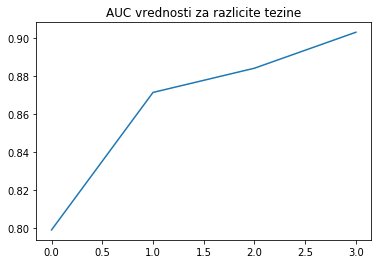

In [61]:
plt.title('AUC vrednosti za razlicite tezine')
plt.plot(np.arange(0, len(class_weights)), roc_auc_scores)

In [62]:
argmax = np.argmax(roc_auc_scores)
argmax

3

In [63]:
optimal_weights = class_weights[argmax]
optimal_weights

{0: 0.05, 1: 200}

In [64]:
roc_auc_scores[argmax]

0.9032898125943689

Ovaj pristup se može generalizovati i na druge binarne klasifikatore. Svi oni imaju `balanced` parametar.

<div class='bg-info' style='padding: 20px'>
Za dalje čitanje:
<ul> 
    <li> <a href='https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28'> Handling imbalanced datasets in ML </a> </li>
</ul>
</div>